In [801]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [891]:
img=cv2.imread('receipt.jpg')
img.shape

(453, 340, 3)

In [892]:
#img=cv2.resize(img,(500,600))

In [893]:
orig=img.copy()

In [894]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)


In [895]:
def display_img(img):
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

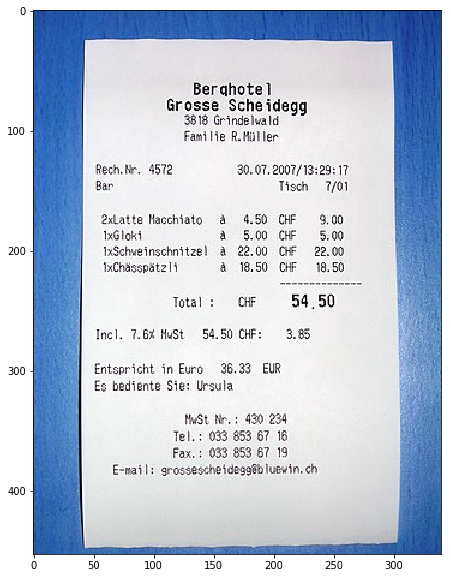

In [896]:
display_img(img)

# DETECTION USING COLOR

In [897]:
imgHsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

In [898]:
lower = np.array([0, 0, 180])
upper = np.array([180, 25, 255])



In [899]:
bw = cv2.inRange(imgHsv, lower, upper)

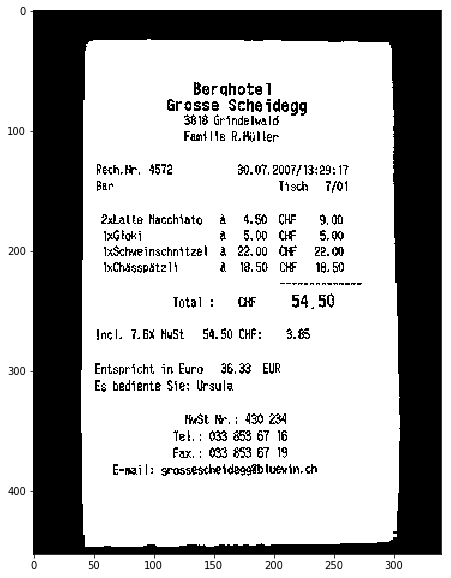

In [900]:
display_img(bw)

# DETECTION USING BRIGHTNESS AND CONTRAST

In [901]:
ret,thresh2 = cv2.threshold(gray.copy(),180,255,cv2.THRESH_BINARY_INV)

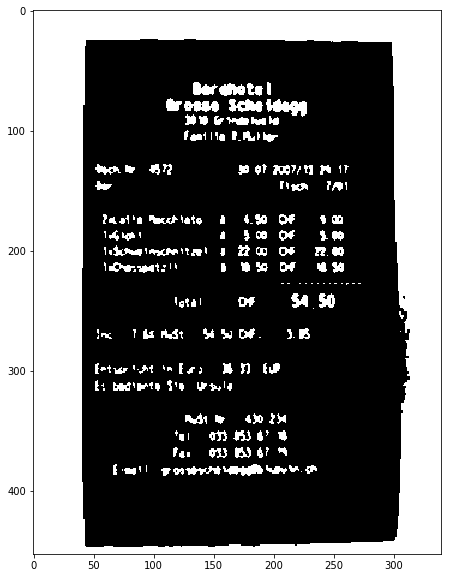

In [902]:
display_img(thresh2)

In [903]:
thresh21=cv2.bitwise_not(thresh2)

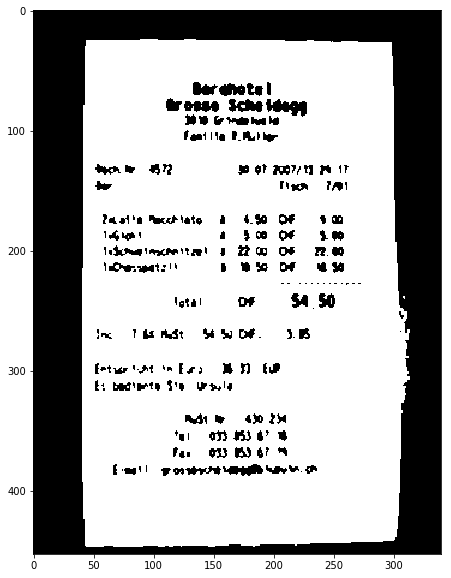

In [904]:
display_img(thresh21)

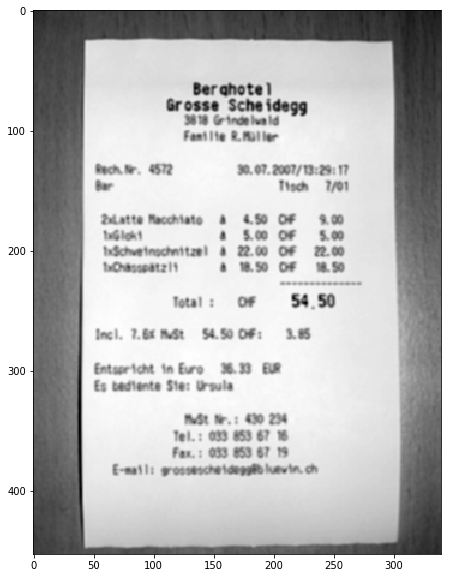

In [905]:
display_img(gray)

# DETECTION USING EDGES

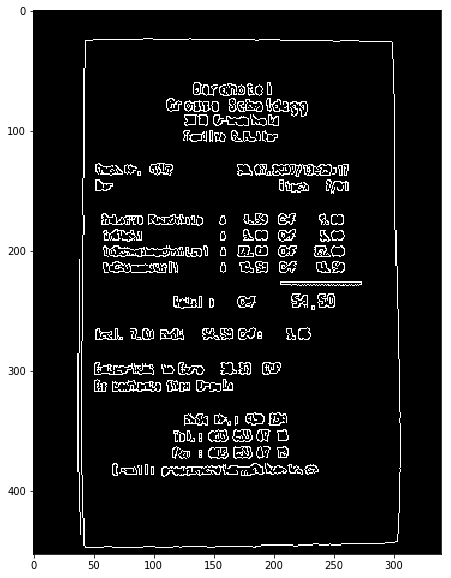

In [906]:
edged = cv2.Canny(gray, 75, 200)
display_img(edged)

In [907]:
contours,hierarchy = cv2.findContours(bw.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [908]:
len(contours)

575

In [909]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, (255), -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


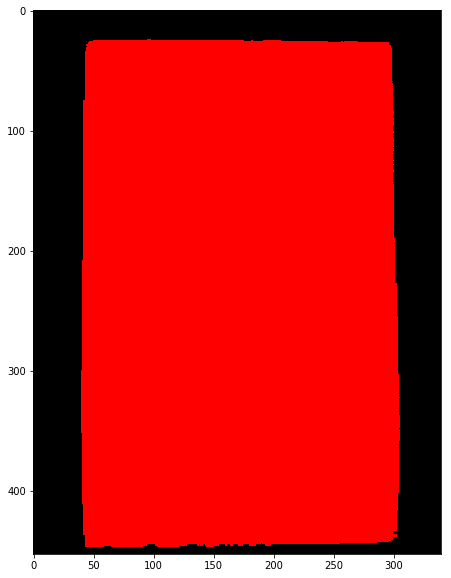

In [910]:
display_img(external_contours)

In [911]:
hierarchy

array([[[  1,  -1,  -1,  -1],
        [  2,   0,  -1,  -1],
        [  3,   1,  -1,  -1],
        ...,
        [573, 571,  -1,  -1],
        [574, 572,  -1,  -1],
        [ -1, 573,  -1,  -1]]], dtype=int32)

In [912]:
cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:5]

In [913]:
for c in cnts:
# approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

In [914]:
0.02*peri

27.753279888629915

In [915]:
approx

array([[[ 47,  26]],

       [[ 43, 446]],

       [[296, 442]],

       [[296,  27]]], dtype=int32)

In [916]:
cnts

[array([[[95, 24]],
 
        [[94, 25]],
 
        [[93, 25]],
 
        ...,
 
        [[98, 25]],
 
        [[97, 24]],
 
        [[96, 24]]], dtype=int32),
 array([[[165, 378]],
 
        [[166, 377]],
 
        [[167, 378]],
 
        [[167, 379]],
 
        [[167, 380]],
 
        [[167, 381]],
 
        [[167, 382]],
 
        [[167, 383]],
 
        [[167, 382]],
 
        [[167, 381]],
 
        [[167, 380]],
 
        [[168, 379]],
 
        [[169, 379]],
 
        [[170, 379]],
 
        [[171, 380]],
 
        [[172, 381]],
 
        [[173, 380]],
 
        [[174, 379]],
 
        [[175, 379]],
 
        [[176, 380]],
 
        [[177, 381]],
 
        [[178, 380]],
 
        [[179, 381]],
 
        [[179, 382]],
 
        [[179, 383]],
 
        [[180, 382]],
 
        [[179, 381]],
 
        [[178, 380]],
 
        [[179, 379]],
 
        [[180, 379]],
 
        [[181, 380]],
 
        [[182, 381]],
 
        [[182, 382]],
 
        [[182, 381]],
 
        [[183, 380]],
 


In [917]:
len(cnts)

5

In [918]:
cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 2)

array([[[ 20,  66, 144],
        [ 33,  79, 157],
        [ 29,  74, 155],
        ...,
        [ 24,  66, 131],
        [ 22,  64, 129],
        [ 23,  65, 130]],

       [[ 22,  68, 146],
        [ 32,  78, 156],
        [ 31,  76, 157],
        ...,
        [ 25,  66, 135],
        [ 23,  64, 133],
        [ 24,  66, 133]],

       [[ 26,  72, 150],
        [ 30,  76, 154],
        [ 33,  78, 159],
        ...,
        [ 24,  64, 139],
        [ 23,  63, 138],
        [ 24,  65, 138]],

       ...,

       [[ 36,  85, 163],
        [ 39,  88, 166],
        [ 38,  87, 165],
        ...,
        [ 40,  80, 152],
        [ 40,  85, 153],
        [ 33,  80, 148]],

       [[ 39,  88, 166],
        [ 40,  89, 167],
        [ 37,  86, 164],
        ...,
        [ 40,  80, 152],
        [ 38,  83, 151],
        [ 32,  79, 147]],

       [[ 40,  89, 167],
        [ 39,  88, 166],
        [ 36,  85, 163],
        ...,
        [ 33,  75, 144],
        [ 34,  79, 147],
        [ 31,  78, 146]]

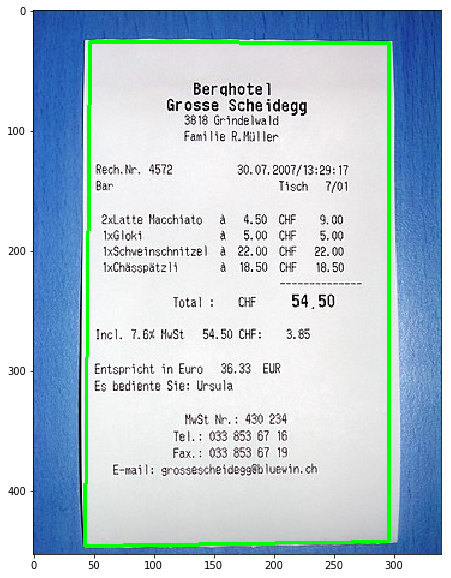

In [919]:
display_img(img)

# FOUR POINT TRANSFORM

In [920]:
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
    return rect

In [921]:
def four_point_transform(image, pts):
# obtain a consistent order of the points and unpack them
# individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
# compute the width of the new image, which will be the
# maximum distance between bottom-right and bottom-left
# x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
# compute the height of the new image, which will be the
# maximum distance between the top-right and bottom-right
# y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
# now that we have the dimensions of the new image, construct
# the set of destination points to obtain a "birds eye view",
# (i.e. top-down view) of the image, again specifying points
# in the top-left, top-right, bottom-right, and bottom-left
# order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
# compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
# return the warped image
    return warped

In [922]:
warped = four_point_transform(orig, screenCnt.reshape(4,2) )

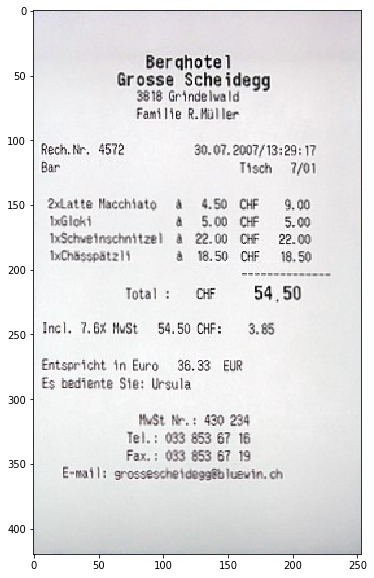

In [923]:
display_img(warped)

In [924]:
warped.shape

(420, 253, 3)

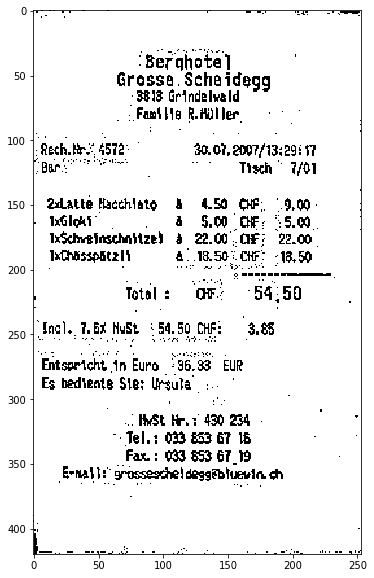

In [925]:
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
final = cv2.adaptiveThreshold(warped.copy(),50,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,4)
display_img(final)